## Partie Chaine de Markov (Part 1)
## fichier a completer par les etudiant.es
## L. Likforman

In [32]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

filename_A='bigramenglish.txt'
A=np.loadtxt(filename_A)
print(len(A))
filename_F='bigramfrancais.txt'
F=np.loadtxt(filename_F)
print(len(F))
dic={'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i', '11': 'j',
'12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' , '20': 's', '21' : 't', '22'
: 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : ' '}
print(len(dic))
print(A)

28
28
28
[[0.0000000e+00 1.1268720e-01 4.3608943e-02 4.5454545e-02 3.2904451e-02
  2.2094495e-02 4.1763341e-02 1.5555790e-02 6.4437882e-02 6.8920059e-02
  3.6384729e-03 4.2185193e-03 2.3465514e-02 3.9759544e-02 2.2832736e-02
  7.0343809e-02 3.1058848e-02 1.4237503e-03 2.5680236e-02 6.6916262e-02
  1.6452225e-01 1.0388104e-02 7.0660198e-03 7.0502004e-02 1.0546298e-04
  1.0599030e-02 5.2731491e-05 0.0000000e+00]
 [0.0000000e+00 1.4701126e-05 2.2933757e-02 3.3959601e-02 3.8075917e-02
  1.4701126e-04 6.1744730e-03 2.4697892e-02 8.8206757e-04 3.7046838e-02
  8.8206757e-04 1.1907912e-02 8.1150216e-02 3.5870748e-02 2.2051689e-01
  1.4701126e-04 1.8082385e-02 1.4701126e-05 9.4822263e-02 9.5410308e-02
  1.3348623e-01 1.1760901e-02 3.3371556e-02 9.8497545e-03 5.8804504e-04
  1.9846520e-02 8.8206757e-04 6.7478169e-02]
 [0.0000000e+00 7.1874260e-02 7.8982703e-04 7.8982703e-05 7.8982703e-04
  2.8275808e-01 7.8982703e-05 7.8982703e-05 7.8982703e-05 7.0294605e-02
  7.8982703e-03 7.8982703e-05 1.20843

## I.2.a 
bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux symboles (caractères ou espaces). Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i.
A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la dernière colonne ?
Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre

la première ligne de la matrice de transition correspond à la probabilité de la transition vers l'état 0 en partant de n'importe où


In [2]:

s = 0
for i in range(28):
    s+= A[0][i]
print(s)

0.9999999997710001


In [3]:
L_transi = np.zeros(28)
for i in range(28):    
    #max = A[i][0]
    L_transi[i] = np.argmax(A[i,:])
    '''for j in range(28):
        if A[i][j]>= max:
            max = A[i][j]
            L_transi[i] = j # on rajoute +1 car le dico commence à 0'''


In [4]:
for i in range(0, 28):
    end = dic[f"{int(L_transi[i]+1)}"]
    start = dic[f"{int(i+1)}"]
    print(f"{start} : {end}")

  : t
a : n
b : e
c : o
d :  
e :  
f :  
g :  
h : e
i : n
j : o
k :  
l : e
m : e
n :  
o : n
p : e
q : u
r : e
s :  
t : h
u : r
v : e
w : a
x : t
y :  
z : e
  :  


In [5]:
"".join([dic[f"{int(etat)}"] for etat in L_transi])

'smdnzzzzdmnzddzmdtdzgqd szdz'

## I.2.b
a


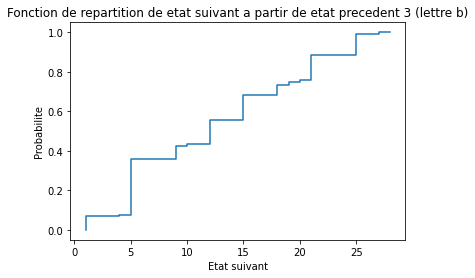

In [6]:
plt.step(range(1, 29), np.cumsum(A[2,]))
#plt.step()
plt.title('Fonction de repartition de etat suivant a partir de etat precedent 3 (lettre b)')
plt.xlabel('Etat suivant')
plt.ylabel('Probabilite') 
plt.show()

In [7]:
def etat_suivant(ligne_matrice_trans):
    '''
    La fonction génère un état (à t+1) à partir de l’état courant (à t) 
    La ligne de la matrice de transitions correspond aux probabilités 
    de transiter de l etat courant vers les autres etats.
    '''
    f_repartition = np.cumsum(ligne_matrice_trans)
    unif = np.random.random()
    stat = 0
    while(unif >= f_repartition[stat]):
        stat = stat+1
    return stat+1
'''for i in range(40):
    print(etat_suivant(A[0:]))'''

'for i in range(40):\n    print(etat_suivant(A[0:]))'

In [8]:
str(2)

'2'

In [9]:
'''def genere_state_seq(matrice_transitions, etat_initial):
    """
    Cette fonction génère une séquence d'états à partir d'un état initial donné
    et d'une matrice de transitions donnée, en s'arrêtant lorsque l'état final (28)
    est atteint.
    
    :param matrice_transitions: la matrice de transitions entre les états
    :param etat_initial: l'état initial à partir duquel la séquence d'états est générée
    :return: une liste contenant la séquence d'états générée
    """
    seq_etats = [etat_initial]
    etat_courant = etat_initial
    while etat_courant != 28:
        ligne_transitions = matrice_transitions[etat_courant-1]
        etat_courant = etat_suivant(ligne_transitions)
        seq_etats.append(etat_courant)
    seq_caracteres = [dic[str(etat)] for etat in seq_etats]
    return ''.join(seq_caracteres)


matrice_transitions = np.loadtxt('bigramenglish.txt')


etat_initial = 1
mot = genere_state_seq(matrice_transitions, etat_initial)


print(mot)'''

'def genere_state_seq(matrice_transitions, etat_initial):\n    """\n    Cette fonction génère une séquence d\'états à partir d\'un état initial donné\n    et d\'une matrice de transitions donnée, en s\'arrêtant lorsque l\'état final (28)\n    est atteint.\n    \n    :param matrice_transitions: la matrice de transitions entre les états\n    :param etat_initial: l\'état initial à partir duquel la séquence d\'états est générée\n    :return: une liste contenant la séquence d\'états générée\n    """\n    seq_etats = [etat_initial]\n    etat_courant = etat_initial\n    while etat_courant != 28:\n        ligne_transitions = matrice_transitions[etat_courant-1]\n        etat_courant = etat_suivant(ligne_transitions)\n        seq_etats.append(etat_courant)\n    seq_caracteres = [dic[str(etat)] for etat in seq_etats]\n    return \'\'.join(seq_caracteres)\n\n\nmatrice_transitions = np.loadtxt(\'bigramenglish.txt\')\n\n\netat_initial = 1\nmot = genere_state_seq(matrice_transitions, etat_initial)\n\

In [10]:
def  generate_state_seq(A):
    
    """
    Calculate a sequence of states

    """  
    numStates = len(A)
# Generate the emitting states sequence 
    t = 0  
    stateSeq=[]
    state = 1
    
    # tant qu'on n'a pas atteint l'état final (28)
    while state != numStates:
        # ajouter l'état courant à la séquence d'états
        stateSeq.append(state)
        # état suivant
        state = etat_suivant(A[state-1])
    
    # ajouter l'état final à la séquence d'états
    stateSeq.append(numStates)
    
    return stateSeq

def display_seq(seq):
    str_seq = ""
    .....
    return str_seq

In [11]:
seq = generate_state_seq(A)


In [73]:
def display_seq(seq_etats):
    """
    Cette fonction transforme une séquence d'états en séquence de caractères
    à l'aide d'un dictionnaire qui fait correspondre chaque état à un caractère.
    
    :param seq_etats: la séquence d'états à transformer
    :param dictionnaire: le dictionnaire qui fait correspondre chaque état à un caractère
    :return: une chaîne de caractères représentant la séquence de caractères correspondant à la séquence d'états
    """
    #print(seq_etats)
    #for etat in seq_etats:
     #   print(str(etat))
    seq_caracteres = [dic[str(etat)] for etat in seq_etats]
    return ''.join(seq_caracteres)

In [74]:
print(display_seq(seq))

 iet 


# I.2.c

In [89]:
def modifie_mat_dic(A,dic):
    dic['29'] = '.'
    A_mod = np.zeros((29, 29))
    
    # Copie des probabilités de transition de la matrice A dans la nouvelle matrice A_mod
    for i in range(28):
        for j in range(28):
            A_mod[i, j] = A[i, j]/(1/0.9)
    
    
    A_mod[28, 28] = 1
    A_mod[27,0] = 0.9
    A_mod[27,27] = 0
    # Probabilité de transition de chaque état final de mot vers l'état final de phrase
    for i in range(28):
        A_mod[i, 28] = 0.1
    
    return A_mod, dic

In [90]:
Amod,dicmod=modifie_mat_dic(A,dic)
#print(Amod)
print(dicmod)


{'1': ' ', '2': 'a', '3': 'b', '4': 'c', '5': 'd', '6': 'e', '7': 'f', '8': 'g', '9': 'h', '10': 'i', '11': 'j', '12': 'k', '13': 'l', '14': 'm', '15': 'n', '16': 'o', '17': 'p', '18': 'q', '19': 'r', '20': 's', '21': 't', '22': 'u', '23': 'v', '24': 'w', '25': 'x', '26': 'y', '27': 'z', '28': ' ', '29': '.'}


In [91]:
s = 0
for i in range(29):
    s+= Amod[26][i]
print(s)

1.0000000016199992


In [92]:
def genere_phrase(A, dic):
    t = 0
    numStates = len(dic)
    stateSeq = []
    stateSeq.append(1)  # on commence par état 1
    
    while stateSeq[-1] != 29:  # tant qu'on n'a pas atteint l'état final de phrase
        etat_courant = stateSeq[-1]
        ligne_transitions = A[etat_courant - 1, :]
        etatSuivant = etat_suivant(ligne_transitions)
        #print(etatSuivant)
        stateSeq.append(etatSuivant)
        
        if etat_suivant == 28:  # si on arrive à l'état final de mot, ajouter un espace
            stateSeq.append(27)
    
    phrase = display_seq(stateSeq)
    return phrase

In [93]:
print('generation de phrases  :')
for i in range (5) :
    state_seq=genere_phrase(Amod,dicmod)
    print(state_seq)

    


generation de phrases  :
 use  hen.
 p  tof  ai.
 wathanes  and  .
 pal.
 le  maticowo.


## I.3


In [94]:
#transformer les espaces en +/- dans le dictionnaire et inversion
dicmod['1']='-'
dicmod['28']='+'
dicmod['29']='.'

def calc_vraisemblance(string, dic, mat):
    dicInv = {v: k for k, v in dic.items()}
    vraisemblance = 1.0
    state = dicInv[string[0]]
    for i in range(1, len(string)):
        c = string[i]
        if c != ' ':
            if c == '.':
                next_state = '29'
            elif c == '-':
                next_state = '1'
            elif c == '+':
                next_state = '28'
            else:
                next_state = dicInv[c]
            vraisemblance *= mat[int(state)-1][int(next_state)-1]
            state = next_state
    return vraisemblance

In [117]:
sentence = "-to+-be+-or+-not+-to+-be+."
print(calc_vraisemblance(sentence,dicmod,Amod))

sentence2 = "-etre+-ou+-ne+-pas+-etre+."
Fmod,dicmod=modifie_mat_dic(F,dic)
#transformer les espaces en +/- dans le dictionnaire et inversion
dicmod['1']='-'
dicmod['28']='+'
dicmod['29']='.'

print(calc_vraisemblance(sentence2,dicmod,Fmod))

1.0959314401232204e-20
1.3929121049138018e-20


Partie II

II.1) Les zéros de la matrice B correspondent aux symboles qui n'apparaissent jamais dans un état donné, c'est-à-dire que la probabilité de voir un symbole qui correspond à un zéro dans cet état est nulle. Les zéros de la matrice A correspondent à des transitions interdites, c'est-à-dire qu'il n'est pas possible d'aller de l'état i à l'état j si a(i,j)=0. Le vecteur p représente les probabilités initiales, donc les zéros du vecteur p correspondent à un état initial impossible.

In [ ]:
def etat_suivant(qt, A):
    """Génère l'état suivant à partir de l'état courant et de la matrice de transitions A."""
    proba_transition = A[qt-1,:] # on récupère la ligne correspondante à l'état courant
    cum_sum = np.cumsum(proba_transition) # calcul de la fonction de répartition
    r = np.random.rand() # on tire un nombre aléatoire entre 0 et 1
    qt_1 = np.sum(cum_sum < r) + 1 # on trouve l'état suivant en utilisant la fonction de répartition
    return qt_1




In [120]:

A0=np.loadtxt('A0.txt')
B0=np.loadtxt('B0.txt')
vec_pi0 =np.loadtxt('vect_pi0.txt')

print(A0.shape)
print(B0.shape)
print(vec_pi0.shape)

(5, 5)
(32, 5)
(5,)
